In [1]:
# Importing the neccessary libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from math import sin, cos, exp, pi
import math

# Functions
### Function for generating the domain

In [2]:
# Function for generating the domain
 
# Input1: the width of the domain
# Input2: the height of the domain
# Input3: the divison point - the relative height of the full rectangle
# Input4: the border_dist - sets the distance of the border from the cirucmference
# Output: list of the followings:
#    x coordinates of the circumference
#    y coordinates of the circumference
#    x coordinates of the inner domain
#    y coordinates of the inner domain
#    x coordinates of the border
#    y coordinates of the border
#    list of x coordinates of the separated border
#    list of y coordinates of the separated border
#    list of x coordinates of the circumference
#    list of y coordinates of the circumference
#    list of x coordinates of the separated top border
#    list of y coordinates of the separated top border
#    list of x coordinates of the separated top circumference
#    list of y coordinates of the separated top circumference

def rect_circ2(width, height, devision_point, border_dist):
    
    # Creating lists to save the coordinates
    x_coord_circ = []
    y_coord_circ = []
    
    x_filled = []
    y_filled = []
    
    x_border = []
    y_border = []

    # Generating the coordinates
    x_lower_upper = list(np.array(range(int(-width/2*100), int(width/2*100)))/100)
    y_lower = [-height/2]*len(x_lower_upper)
    y_upper = [height/2]*len(x_lower_upper)

    y_left_right = list(np.array(range(int(-height/2*100), int(height/2*100)))/100)
    x_left = [-width/2]*len(y_left_right)
    x_right = [width/2]*len(y_left_right)
    
####################################################################################  
    
    # Generating the circumference
    x_coord_circ += x_lower_upper + x_left + x_right
    y_coord_circ += y_lower + y_left_right + y_left_right
    
    # Generating the upper parts of the domain
    x_temp1 = x_lower_upper[int(len(x_lower_upper)/10*0):int(len(x_lower_upper)/10*2)]
    x_temp3 = x_lower_upper[int(len(x_lower_upper)/10*4):int(len(x_lower_upper)/10*6)]
    x_temp5 = x_lower_upper[int(len(x_lower_upper)/10*8):int(len(x_lower_upper)/10*10)]  
    x_coord_circ += x_temp1 + x_temp3 + x_temp5
    y_temp135 = [height/2]*len(x_temp1)
    y_coord_circ += y_temp135 * 3
    
    # Generating the lower parts of the domain
    x_temp2 = x_lower_upper[int(len(x_lower_upper)/10*2):int(len(x_lower_upper)/10*4)]
    x_temp4 = x_lower_upper[int(len(x_lower_upper)/10*6):int(len(x_lower_upper)/10*8)]
    x_coord_circ += x_temp2 + x_temp4
    y_temp24 = [y_left_right[int(len(y_left_right)*devision_point)]]*len(x_temp2)
    y_coord_circ += y_temp24*2
    
    # Generating the perpendicular parts of the domain
    y_temp1 = y_left_right[int(len(y_left_right)*devision_point):]
    y_coord_circ += y_temp1*4
    x_coord_perp1 = [x_lower_upper[int(len(x_lower_upper)/10*2)]] * len(y_temp1)
    x_coord_perp2 = [x_lower_upper[int(len(x_lower_upper)/10*4)]] * len(y_temp1)
    x_coord_perp3 = [x_lower_upper[int(len(x_lower_upper)/10*6)]] * len(y_temp1)
    x_coord_perp4 = [x_lower_upper[int(len(x_lower_upper)/10*8)]] * len(y_temp1) 
    
    x_coord_circ += x_coord_perp1 + x_coord_perp2 + x_coord_perp3 + x_coord_perp4
    
    x_circ_top_matrix = [x_temp1, x_coord_perp1, x_temp2, x_coord_perp2, x_temp3, x_coord_perp3, x_temp4, x_coord_perp4, x_temp5]
    y_circ_top_matrix = [y_temp135, y_temp1, y_temp24, y_temp1, y_temp135, y_temp1, y_temp24, y_temp1, y_temp135]
    
    # Generating the separate circumference
    x_coord_circumference_sep = [x_left, x_temp1 + x_coord_perp1 + x_temp2 + x_coord_perp2 + x_temp3 + x_coord_perp3 + x_temp4 + x_coord_perp4 + x_temp5, x_right, x_lower_upper]
    y_coord_circumference_sep = [y_left_right, y_temp135 + y_temp1 + y_temp24 + y_temp1 + y_temp135 + y_temp1 + y_temp24 + y_temp1 + y_temp135, y_left_right, y_lower]
    
####################################################################################    
    
    # Generating the outer border - lower and upper
    x_lower_upper_border = list(np.array(range(int((-width-border_dist)/2*200), int((width + border_dist)/2*200)))/200)
    y_lower_border = [(-height - border_dist)/2]*len(x_lower_upper_border)
    y_upper_border = [(height + border_dist)/2]*len(x_lower_upper_border)
    
    # Generating the outer border - left and right
    y_left_right_border = list(np.array(range(int((-height - border_dist)/2*100), int((height + border_dist)/2*100)))/100)
    x_left_border = [(-width - border_dist)/2]*len(y_left_right_border)
    x_right_border = [(width + border_dist)/2]*len(y_left_right_border)
    
    # Generating the outer border - perpendicular
    y_temp_bord = list(np.array(y_left_right[int(len(y_left_right)*devision_point):]) + border_dist/2)
    x_mid_bord1 = [x_lower_upper[int(len(x_lower_upper)/10*2)] + border_dist/2] * len(y_temp_bord)
    x_mid_bord2 = [x_lower_upper[int(len(x_lower_upper)/10*4)] - border_dist/2] * len(y_temp_bord)
    x_mid_bord3 = [x_lower_upper[int(len(x_lower_upper)/10*6)] + border_dist/2] * len(y_temp_bord)
    x_mid_bord4 = [x_lower_upper[int(len(x_lower_upper)/10*8)] - border_dist/2] * len(y_temp_bord)   
    
    # Generating the outer border - upper part
    index_of_temp1 = x_lower_upper_border.index(x_lower_upper[int(len(x_lower_upper)/10*2)] + border_dist/2)
    index_of_temp2 = x_lower_upper_border.index(x_lower_upper[int(len(x_lower_upper)/10*4)] - border_dist/2)
    index_of_temp3 = x_lower_upper_border.index(x_lower_upper[int(len(x_lower_upper)/10*6)] + border_dist/2)
    index_of_temp4 = x_lower_upper_border.index(x_lower_upper[int(len(x_lower_upper)/10*8)] - border_dist/2)
    
    x_upper_bord1 = x_lower_upper_border[0:index_of_temp1+1]
    x_upper_bord2 = x_lower_upper_border[index_of_temp1:index_of_temp2+1]
    x_upper_bord3 = x_lower_upper_border[index_of_temp2:index_of_temp3+1]
    x_upper_bord4 = x_lower_upper_border[index_of_temp3:index_of_temp4+1]
    x_upper_bord5 = x_lower_upper_border[index_of_temp4:]
    x_upper_bord = x_upper_bord1 + x_mid_bord1 + x_upper_bord2 + x_mid_bord2 + x_upper_bord3 + x_mid_bord3 + x_upper_bord4 + x_mid_bord4 + x_upper_bord5
    x_upper_bord_matrix = [x_upper_bord1, x_mid_bord1, x_upper_bord2, x_mid_bord2, x_upper_bord3, x_mid_bord3, x_upper_bord4, x_mid_bord4, x_upper_bord5]
    
    y_upper_border1 = [(height + border_dist)/2]*len(x_upper_bord1)
    y_upper_border2 = [y_left_right[int(len(y_left_right)*devision_point)] + border_dist/2]*len(x_upper_bord2)      
    y_upper_border3 = [(height + border_dist)/2]*len(x_upper_bord3) 
    y_upper_border4 = [y_left_right[int(len(y_left_right)*devision_point)] + border_dist/2]*len(x_upper_bord4)     
    y_upper_border5 = [(height + border_dist)/2]*len(x_upper_bord5)  
    y_upper_border = y_upper_border1 + y_temp_bord + y_upper_border2 + y_temp_bord + y_upper_border3 + y_temp_bord + y_upper_border4 + y_temp_bord + y_upper_border5
    y_upper_bord_matrix = [y_upper_border1, y_temp_bord, y_upper_border2, y_temp_bord, y_upper_border3, y_temp_bord, y_upper_border4, y_temp_bord, y_upper_border5]
    
    # Appending everything to the lists
    x_border += x_left_border + x_upper_bord + x_right_border + x_lower_upper_border
    y_border += y_left_right_border + y_upper_border + y_left_right_border + y_lower_border

    # Appending to the separate borders
    x_sep_borders = [x_left_border, x_upper_bord, x_right_border, x_lower_upper_border]
    y_sep_borders = [y_left_right_border, y_upper_border, y_left_right_border, y_lower_border]
    
####################################################################################    
    
    # Filling up the lower devision_point of the rectangle
    for i in range(1,int(len(y_left_right) * devision_point)-1):
        #appending the x and y coordinates
        x_filled += x_lower_upper[1:-1]
        y_filled += [y_left_right[i]]*len(x_lower_upper[1:-1])
    
    # Filling up the rest of the domain
    for i in range(int(len(y_left_right) * devision_point), len(y_left_right)):        
        temp = x_lower_upper[int(len(x_lower_upper)/10*0)+1:int(len(x_lower_upper)/10*2)-1]      
        x_filled += temp
        x_filled += x_lower_upper[int(len(x_lower_upper)/10*4)+1:int(len(x_lower_upper)/10*6)-1]
        x_filled += x_lower_upper[int(len(x_lower_upper)/10*8)+1:int(len(x_lower_upper)/10*10)-1]
        y_filled += [y_left_right[i]]*len(temp)*3
        
####################################################################################  
    
    # Returning the coordinates
    return [x_coord_circ, y_coord_circ, x_filled, y_filled, x_border, y_border, x_sep_borders, y_sep_borders, x_coord_circumference_sep, y_coord_circumference_sep, x_upper_bord_matrix, y_upper_bord_matrix, x_circ_top_matrix, y_circ_top_matrix]

### Function for plotting the domain

In [3]:
# Function for plotting the domain

# Input1: x coordinates of the circumference
# Input2: y coordinates of the circumference
# Input3: x coordinates of the inner domain
# Input4: y coordinates of the inner domain
# Input5: x coordinates of the border
# Input6: y coordinates of the border
# Input7: savefig boolean - if true, the figure is saved as "domain.jpg"

def rect_plot(border_coord, circum_coord, inner_coord, boarder_training_coord, circum_training_coord, inner_training_coord, visibility, savefig):

    plt.figure(figsize = (10,10))
    plt.grid()
    
    custom_lines = []
    custom_legend_label = []
    
    if visibility[0] == True:
        plt.scatter(border_coord[0], border_coord[1], color = 'darkred', s = 20)
        custom_lines.append(Line2D([0], [0], color='darkred', lw=5))
        custom_legend_label.append('Border')
    
    if visibility[1] == True:
        plt.scatter(circum_coord[0], circum_coord[1], color = 'firebrick', s = 20)
        custom_lines.append(Line2D([0], [0], color='firebrick', lw=5))
        custom_legend_label.append('Circumference')
        
    if visibility[2] == True:
        plt.scatter(inner_coord[0], inner_coord[1], color = 'lightcoral', s = 5, alpha = 0.01)
        custom_lines.append(Line2D([0], [0], color='lightcoral', lw=5))
        custom_legend_label.append('Domain')
        
    if visibility[3] == True:
        plt.scatter(boarder_training_coord[0], boarder_training_coord[1], color = 'gold', s = 30)
        custom_lines.append(Line2D([0], [0], color='gold', lw=5))
        custom_legend_label.append('Boarder training points')

    if visibility[4] == True:
        plt.scatter(circum_training_coord[0], circum_training_coord[1], color = 'orange', s = 30)
        custom_lines.append(Line2D([0], [0], color='orange', lw=5))
        custom_legend_label.append('Circumference training points')
        
    if visibility[5] == True:
        plt.scatter(inner_training_coord[0], inner_training_coord[1], color = 'orangered', s = 100)
        custom_lines.append(Line2D([0], [0], color='orangered', lw=5))
        custom_legend_label.append('Inner training points')
        

    plt.title('The generated domain with width = ' + str(width) + ', height = ' + str(height), fontsize = 18, y = 1.05)
    plt.xlabel('x', fontsize = 14)
    plt.ylabel('y', fontsize = 14)    
    plt.legend(custom_lines, custom_legend_label, bbox_to_anchor=(1.05, 1), loc=2, fontsize = 15)
    
    if savefig == True:
        plt.savefig('domain.jpg', dpi = 600, bbox_inches='tight')
    
    plt.show()

### Function for generating the training points

In [4]:
# Function for generating the training points

# Input1: x coordinates to split
# Input2: y coordinates to split
# Input3: number of elements after splitting
# Output: vector containing the separated x and y training coordinates if no error occurred

def evenly_distr_points_gen(x_values_of_side, y_values_of_side, num_of_points, side_str):
    
    if side_str == 'top':
        
        # Creating lists to save the data
        x_sep_training = []
        y_sep_training = []

        # Calculating the distance of the small part / num_of_points
        beginning_temp = np.array([x_values_of_side[2][0], y_values_of_side[2][0]])
        end_temp = np.array([x_values_of_side[2][-1], y_values_of_side[2][-1]])
        dist_et = np.linalg.norm(beginning_temp - end_temp)/(num_of_points+1)
        
        # Iterating through the x and y coordinates and generating the points uniformly according to the lengths
        for i in range(0,len(x_values_of_side)):
            
            #calculating the distances
            beginning_temp = np.array([x_values_of_side[i][0], y_values_of_side[i][0]])
            end_temp = np.array([x_values_of_side[i][-1], y_values_of_side[i][-1]])        
            curr_num_of_points = int(np.linalg.norm(beginning_temp - end_temp)/dist_et)+1
            
            #calculating the indices of the points
            idx = np.round(np.linspace(0, len(x_values_of_side[i]) - 1, curr_num_of_points)).astype(int)
            
            #when i = 1,3,5, the last element shouldn't be added
            if i == 1 or i == 3 or i == 5:
                idx = idx[0:-1]
                
            #appending the training points
            x_sep_training += list(np.array(x_values_of_side[i])[idx])
            y_sep_training += list(np.array(y_values_of_side[i])[idx])
                                     
    else:
    
        # If the num_of_training_points_to_gen is higher than the length of all points, return error
        if num_of_points > len(x_values_of_side):
            print('The number of training points to generate is higher than all the training points. Please enter a valid number.')
            return()

        # Generating the points uniformly
        idx = np.round(np.linspace(0, len(x_values_of_side) - 1, num_of_points)).astype(int)

        # Selecting the appropriate elements from the vectors
        x_sep_training = np.array(x_values_of_side)[idx]
        y_sep_training = np.array(y_values_of_side)[idx]

        
    # Returning with the new vectors
    return([x_sep_training, y_sep_training])

### Function for generating the inner points

In [5]:
# Function for generating the inner points

# Input1: x coordinates of the inner data
# Input2: y coordinates of the inner data
# Input3: x coordinates of the requested data
# Input4: y coordinates of the requested data

def inner_points_generation(x_filled, y_filled, x_inner_results, y_inner_results):

    # Creating a list to store the found indices
    found_coordinates_index = []

    # Iterating through the given inner points
    for j in range(0,len(x_inner_results)):

        # Boolean for when to stop searching
        searching = True
        # Index of the x_filled and y_filled data
        i = 0

        # Iterating through the x_filled and y_filled data
        while searching == True:

            # If x matches:
            if x_filled[i] == x_inner_results[j]:
                # If y matches:
                if y_filled[i] == y_inner_results[j]:

                    # Saving the index to the list
                    found_coordinates_index.append(i)

                    # Changing the boolean to False, so the while loop stops
                    searching = False

            # Increasing the i index
            i += 1
            
            # Checking if i has a valid value
            if i == len(x_filled)-2:
                print('The requested coordinates are not found.')
                return()
    
    # Returning with the indices
    return found_coordinates_index

### Function for calling the functions and generating the domain

In [6]:
# Function for calling the rect_circ2, evenly_distr_points_gen and inner_points_generation functions
# Calculating the domain 

# Input1: width of the domain
# Input2: height of the domain
# Input3: devision points
# Input4: distance between the circumference and the border
# Input5: string containing the side (bottom, left, top, right)
# Input6: number of training points on the border
# Input7: number of training points on the circumference
# Input8: the x coordinates of the requested inner points
# Input9: the y coordinates of the requested inner points
# Output: x, y coordinates of the following: border-, circumference-, inner-, training border-, training cirum.- training inner coordinates

def calling_circ_training_inner(width, height, devision_point, border_dist, side_str, num_points_to_gen_training_border, num_points_to_gen_training_circum, x_inner_requested, y_inner_requested):

    # Generating the domain 
    x_y_coord = rect_circ2(width, height, devision_point, border_dist)

    # Circumference
    x_coordinates = x_y_coord[0]
    y_coordinates = x_y_coord[1]

    # Inner domain
    x_filled = x_y_coord[2]
    y_filled = x_y_coord[3]

    # Outer border
    x_border = x_y_coord[4]
    y_border = x_y_coord[5]

    # Outer border separated - x coordinates
    x_border_left = x_y_coord[6][0]
    x_border_top = x_y_coord[6][1]
    x_border_right = x_y_coord[6][2]
    x_border_bottom = x_y_coord[6][3]

    # Outer border separated - y coordinates
    y_border_left = x_y_coord[7][0]
    y_border_top = x_y_coord[7][1]
    y_border_right = x_y_coord[7][2]
    y_border_bottom = x_y_coord[7][3]

    # Outer border separated - x coordinates
    x_circum_left = x_y_coord[8][0]
    x_circum_top = x_y_coord[8][1]
    x_circum_right = x_y_coord[8][2]
    x_circum_bottom = x_y_coord[8][3]

    # Outer border separated - y coordinates
    y_circum_left = x_y_coord[9][0]
    y_circum_top = x_y_coord[9][1]
    y_circum_right = x_y_coord[9][2]
    y_circum_bottom = x_y_coord[9][3]

    # Outer top border separated - x and y coordinates
    x_border_top_separated = x_y_coord[10]
    y_border_top_separated = x_y_coord[11]

    # Outer top circumference separated - x and y coordinates
    x_circum_top_separated = x_y_coord[12]
    y_circum_top_separated = x_y_coord[13]
    
####################################################################################    

    # Setting the appropriate vectors
    if side_str == 'left':
        bord_cir_coord_temp = [x_border_left, y_border_left, x_circum_left, y_circum_left]
    elif side_str == 'top':
        bord_cir_coord_temp = [x_border_top_separated, y_border_top_separated, x_circum_top_separated, y_circum_top_separated]
    elif side_str == 'right':
        bord_cir_coord_temp = [x_border_right, y_border_right, x_circum_right, y_circum_right]
    elif side_str == 'bottom':
        bord_cir_coord_temp = [x_border_bottom, y_border_bottom, x_circum_bottom, y_circum_bottom]

    # Calling the evenly distributied points function for the border training points
    x_y_training_border_temp = evenly_distr_points_gen(bord_cir_coord_temp[0], bord_cir_coord_temp[1], num_points_to_gen_training_border, side_str)
    x_training_boarder = x_y_training_border_temp[0]
    y_training_boarder = x_y_training_border_temp[1]

    # Calling the evenly distributied points function for the circumference training points
    x_y_training_circum_temp = evenly_distr_points_gen(bord_cir_coord_temp[2], bord_cir_coord_temp[3], num_points_to_gen_training_circum, side_str)
    x_training_circum = x_y_training_circum_temp[0]
    y_training_circum = x_y_training_circum_temp[1]
    
####################################################################################    

    # Calling the inner point generator function to find the appropriate coordinates
    inner_resulted_indeces = inner_points_generation(x_filled, y_filled, x_inner_requested, y_inner_requested)

    # Saving the resulted inner points
    x_inner_training = [x_filled[i] for i in inner_resulted_indeces]
    y_inner_training = [y_filled[i] for i in inner_resulted_indeces]
    
####################################################################################  

    # Returning the matrix of the coordinates
    return [ [x_border, y_border], [x_coordinates, y_coordinates], [x_filled, y_filled], [x_training_boarder, y_training_boarder], [x_training_circum, y_training_circum], [x_inner_training, y_inner_training] ]

# Generating the domain

In [9]:
# Setting the width and height
width = 10
height = 10

# Setting the division point - the relative height of the full rectangle
devision_point = 1/3

# Setting the border distance
border_dist = width / 10

# Setting the side
# Options: left, top, bottom, right
side_str = 'top'

# Setting the number of training points to generate
# Option1: if side_str is set 'top' the the following variables should be set to determine the training points 
# in the lower part of the top border
# Option2: if the side_str is set as 'left', 'bottom' or 'right', the amount of all training data should be given
num_points_to_gen_training_border = 1
num_points_to_gen_training_circum = 2

# Setting the inner points for the NN
# Give the following coordinates as floating number
# One digit (if it's and integer or has only one digit), two digits (if it has two or more digits)
x_inner_requested = [-3.0,  0.0,  3.0]
y_inner_requested = [-3.0, -3.0, -3.0]

# Calling the calling_circ_training_inner function
results_temp = calling_circ_training_inner(width, height, devision_point, border_dist, side_str, num_points_to_gen_training_border, num_points_to_gen_training_circum, x_inner_requested, y_inner_requested)

# Putting the coordinates into lists
border_coord = results_temp[0]
circum_coord = results_temp[1]
inner_coord = results_temp[2]
boarder_training_coord = results_temp[3]
circum_training_coord = results_temp[4]
inner_training_coord = results_temp[5]

### Plotting the domain

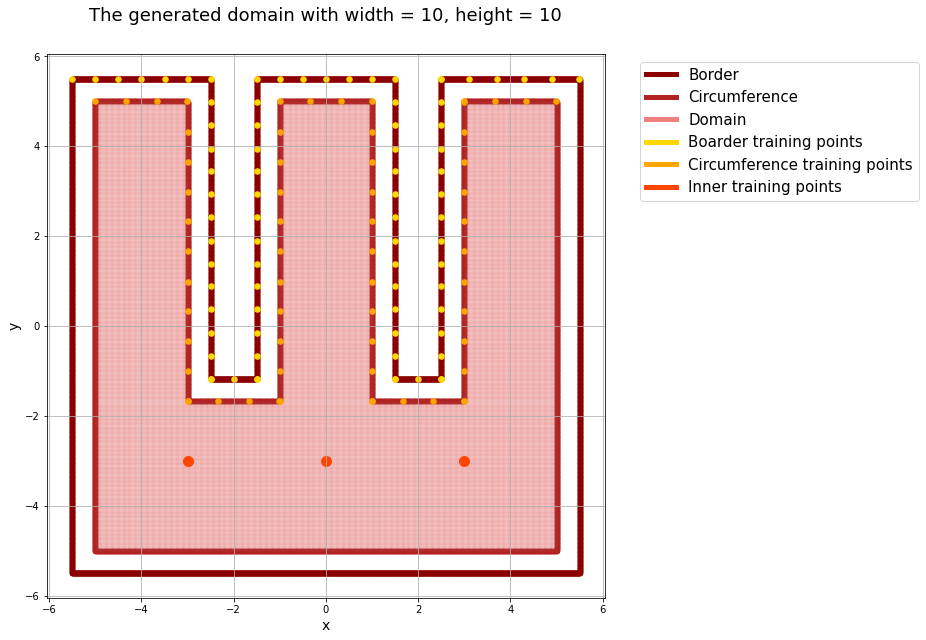

In [10]:
# Setting the visibility of the border, circumference and inner points
border_vis = True
circum_vis = True
inner_vis = True
boarder_training_vis = True
circum_training_vis = True
inner_training_vis = True

# Setting the savefig variable
savefig = True

# Setting the visibility boolean list
visibility = [border_vis, circum_vis, inner_vis, boarder_training_vis, circum_training_vis, inner_training_vis]

# Plotting the domain
rect_plot(border_coord, circum_coord, inner_coord, boarder_training_coord, circum_training_coord, inner_training_coord, visibility, savefig)